In [200]:
# Linear regression

In [201]:
# it contain linear regression in depth

In [202]:
## from andrew ng course that i learn

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import SGDRegressor

In [204]:
data=pd.read_csv("ex1data1.txt",header=None,names=["Size","Price"])

In [205]:
data.head()

,Size,Price
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [206]:
data.shape

(97, 2)

In [207]:
df=data.values
X=np.append(np.ones((97,1)),df[:,0].reshape(-1,1),1)
y=df[:,1].reshape(-1,1)

In [208]:
#defing cost function for linear regression

In [209]:
def cost_function(X,y,theta):
    m=len(y)
    hypo=X.dot(theta)
    error=(hypo-y)**2
    cost=(1/2*m)*np.sum(error)
    return cost

In [210]:
def gradient_descent(X,y,theta,alpha,iterations):
    m=len(y)
    cost_saver=[]
    for i in range(iterations):
        error=X.dot(theta)-y
        gradient=np.dot(X.T,error)
        gradient_update=alpha*1/m*gradient
        theta-=gradient_update
        cost_saver.append(cost_function(X,y,theta))
    return theta,cost_saver
        
        

In [211]:
theta=np.zeros((2,1))

In [212]:
cost_function(X,y,theta)

301772.35305298044

In [213]:
theta_new,cost_per_iter=gradient_descent(X,y,theta,0.01,1400)

In [214]:
theta

array([[-3.57779807],
       [ 1.16108882]])

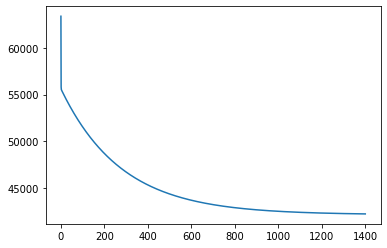

In [215]:
plt.plot(cost_per_iter)
plt.show()

In [216]:
y_prediction=theta_new[0]+theta_new[1]*df[:,0]

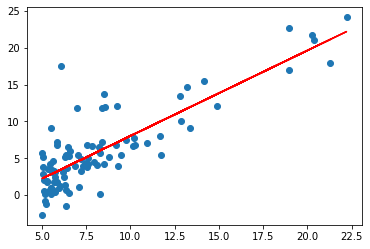

In [217]:
plt.scatter(data.iloc[:,0],data.iloc[:,1])
plt.plot(data.iloc[:,0],y_prediction,c="r")
plt.show()

In [218]:
min(cost_per_iter)

42210.436101651445

In [219]:
# using simple linear regression

In [221]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X,y)

LinearRegression()

In [222]:
y_pred=linreg.predict(X)

In [223]:
linreg.coef_

array([[0.        , 1.19303364]])

In [224]:
linreg.intercept_

array([-3.89578088])

In [225]:
## doinf multiple regression

In [226]:
data=pd.read_csv("ex1data2.txt",header=None)

In [227]:
data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [228]:
data.shape

(47, 3)

In [229]:
df=data.values
X_old=df[:,:2]
y_old=df[:,2]

In [230]:
y_old=y_old.reshape(-1,1)

In [231]:
#applying normalization

In [232]:
def feature_normalize(X):
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    X_upgraded=(X-mean)
    X_upgraded=X_upgraded/std
    return X_upgraded,mean,std

In [233]:
X_old_norm,mean,std=feature_normalize(X_old)

In [234]:
X_old_norm_1=np.append(np.ones((47,1)),X_old_norm.reshape(-1,2),1)

In [235]:
def cost_function_multiple(X,y,theta):
    m=len(y)
    hypo=X.dot(theta)
    error=(hypo-y)**2
    cost=(1/2*m)*np.sum(error)
    return cost

In [236]:
def gradient_descent_multiple(X,y,theta,alpha,iterations):
    m=len(y)
    cost_saver=[]
    for i in range(iterations):
        error=X.dot(theta)-y
        gradient=np.dot(X.T,error)
        gradient_update=alpha*1/m*gradient
        theta-=gradient_update
        cost_saver.append(cost_function(X,y,theta))
    return theta,cost_saver

In [237]:
theta_old=np.zeros((3,1))
cost_function_multiple(X_old_norm_1,y_old,theta_old)

144891729767164.5

In [238]:
theta,cost=gradient_descent_multiple(X_old_norm_1,y_old,theta_old,0.01,400)

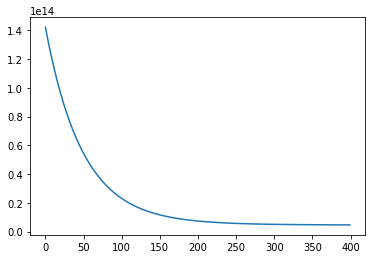

In [239]:
plt.plot(cost)

In [240]:
theta

array([[334302.06399328],
       [ 99411.44947359],
       [  3267.01285407]])

In [241]:
def normal_equation(X,y):
    return np.linalg.inv(X.T*X)*X.T*y

In [242]:
normal_equation(np.matrix(X_old_norm_1),y_old)

matrix([[340412.65957447],
        [109447.79646964],
        [ -6578.35485416]])

In [243]:
#using sklearn

In [244]:
data=pd.read_csv("ex1data2.txt",header=None)

In [245]:
data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [246]:
df=data.values
X=df[:,:2].reshape(-1,2)
y=df[:,2].reshape(-1,1)

In [247]:
from sklearn.preprocessing import StandardScaler
stdscaler=StandardScaler()
X=stdscaler.fit_transform(X)

In [248]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X,y)

LinearRegression()

In [249]:
y_pred=linreg.predict(X)

In [250]:
np.allclose(mean,stdscaler.mean_)

True

In [251]:
# we can also use X.t*X)-1)*X.T*Y but sklearn using same normal equation

In [252]:
# this is all about simple linear regressions

In [253]:
#regularised linear regression 

In [254]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [255]:
data=loadmat("ex5data1.mat")

In [256]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri Nov  4 22:27:26 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[-15.93675813],
        [-29.15297922],
        [ 36.18954863],
        [ 37.49218733],
        [-48.05882945],
        [ -8.94145794],
        [ 15.30779289],
        [-34.70626581],
        [  1.38915437],
        [-44.38375985],
        [  7.01350208],
        [ 22.76274892]]),
 'y': array([[ 2.13431051],
        [ 1.17325668],
        [34.35910918],
        [36.83795516],
        [ 2.80896507],
        [ 2.12107248],
        [14.71026831],
        [ 2.61418439],
        [ 3.74017167],
        [ 3.73169131],
        [ 7.62765885],
        [22.7524283 ]]),
 'Xtest': array([[-33.31800399],
        [-37.91216403],
        [-51.20693795],
        [ -6.13259585],
        [ 21.26118327],
        [-40.31952949],
        [-14.54153167],
        [ 32.55976024],
        [ 13.39343255],
        [ 44.20988595],
        [ -1.14267768],
        [-

In [257]:
X=data["X"]
y=data["y"]
Xtest=data["Xtest"]
ytest=data["ytest"]
Xval=data["Xval"]
yval=data["yval"]

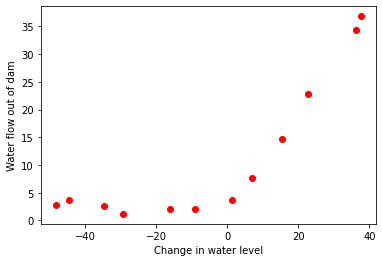

In [258]:
plt.scatter(X,y,c="r")
plt.xlabel("Change in water level")
plt.ylabel("Water flow out of dam")
plt.show()

AS we can see we cant fit simple line to it it cause model to under fit the data and if we use polynomial features it can cause overfitiing so to solve this issue we will use regularization

In [259]:
def regcostfunc(X,y,theta,Lambda):
    m=len(y)
    hypo=np.dot(X,theta)
    #hypot=(hypo-y)**2
    cost=(1/(2*m))*np.sum((hypo-y)**2)
    reg_cost=cost+(Lambda/(2*m))*np.sum((theta[1:]**2))
    #gradeint
    gradient_0=(1/m)*(X.T@(X@theta-y))
    gradient_1=(1/m)*(X.T@(X@theta-y))+((Lambda/m)*theta)
    gradient=np.vstack((gradient_0[0],gradient_1[1:]))
    
    return reg_cost,gradient   

In [260]:
X_1=np.hstack((np.ones((X.shape[0],1)),X))
theta_new=np.ones((2,1))
Lambda=0
reg_cost,gradient=regcostfunc(X_1,y,theta_new,Lambda)

In [261]:
reg_cost

303.9515255535976

In [262]:
gradient

array([[-15.30301567],
       [598.16741084]])

In [263]:
# regularised gradient descent

In [264]:
def reg_gradient_desent(X,y,theta,alpha,iterations,Lambda):
    j_store=[]
    for i in range(iterations):
        cost,gradient=regcostfunc(X,y,theta,Lambda)
        theta-=(alpha*gradient)
        j_store.append(cost)
    return theta,j_store

In [265]:
theta=np.zeros((2,1))

In [266]:
theta_reg,j_store=reg_gradient_desent(X_1,y,theta,0.001,4000,0)

In [267]:
theta_reg

array([[12.81756012],
       [ 0.36615787]])

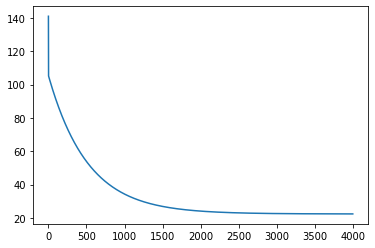

In [268]:
plt.plot(j_store)
plt.show()

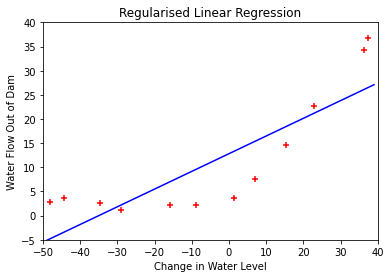

In [269]:
plt.scatter(X,y,marker="+",c="red")
plt.xlabel("Change in Water Level")
plt.ylabel("Water Flow Out of Dam")
X_va=[x for x in range(-50,40)]
Y_va=[y*theta_reg[1]+theta_reg[0] for y in X_va]
plt.plot(X_va,Y_va,c="b")
plt.ylim(-5,40)
plt.xlim(-50,40)
plt.title("Regularised Linear Regression")
plt.show()

In [270]:
# as we can how it is fitting the data

In [271]:
from sklearn.linear_model import Ridge
reg=Ridge(alpha=0.001,max_iter=4000)
reg.fit(X,y)

Ridge(alpha=0.001, max_iter=4000)

In [272]:
reg.intercept_[0],reg.coef_[0][0]

(13.087903321499327, 0.3677791925079173)

In [273]:
theta_reg

array([[12.81756012],
       [ 0.36615787]])

In [274]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X,y)
lasso.intercept_,lasso.coef_

(array([13.0817247]), array([0.36656423]))

In [275]:
## Learning curves

In [276]:
def learning_curve(X,y,Xval,yval,Lambda):
    m=len(y)
    n=X.shape[1]
    error_train=[]
    error_valid=[]
    for i in range(1,m+1):
        theta=reg_gradient_desent(X[0:i,:],y[0:i],np.zeros((n,1)),0.001,3000,Lambda)[0]
        error_train.append(regcostfunc(X[0:i,:],y[0:i],theta,Lambda)[0])
        error_valid.append(regcostfunc(Xval,yval,theta,Lambda)[0])
    return error_train,error_valid

In [277]:
m=X.shape[0]
X_new=np.hstack((np.ones((m,1)),X))
X_val_new=np.hstack((np.ones((21,1)),Xval))

In [278]:
j_train,j_val=learning_curve(X_new,y,X_val_new,yval,0)

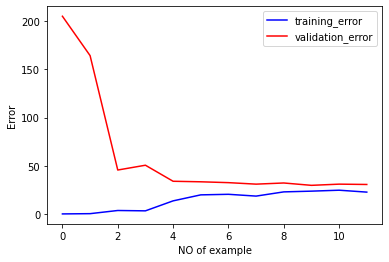

In [279]:
plt.plot(range(12),j_train,c="b",label="training_error")
plt.plot(range(12),j_val,c="r",label="validation_error")
plt.xlabel("NO of example")
plt.ylabel("Error")
plt.legend(loc="best")
plt.show()

In [280]:
print("i","|","train_error","|","validtion_error")
for i in range(1,10):
    print(i,"|",j_train[i-1],"|",j_val[i-1])

i | train_error | validtion_error
1 | 9.860761315262648e-32 | 205.1210957454735
2 | 0.26667458269926014 | 164.2535605474932
3 | 3.548185635907084 | 45.54817576824285
4 | 3.1874889363749985 | 50.52763121765736
5 | 13.543624507919134 | 33.8818916785026
6 | 19.77082269208633 | 33.33501763960231
7 | 20.35490053770414 | 32.44949025865311
8 | 18.491367932249474 | 30.897434817077908
9 | 22.864926631607062 | 32.09291116304466


In [281]:
##adding polyfeatues

In [282]:
from sklearn.preprocessing import PolynomialFeatures
poly_feature=PolynomialFeatures(degree=7)

In [283]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()

In [284]:
X_new=poly_feature.fit_transform(X)
X_new=std_scaler.fit_transform(X_new)
X_new=np.hstack((np.ones((X_new.shape[0],1)),X_new))

In [285]:
X.shape

(12, 1)

In [286]:
X_new.shape

(12, 9)

In [287]:
#for val
X_new_val=poly_feature.fit_transform(Xval)
X_new_val=std_scaler.transform(X_new_val)
X_new_val=np.hstack((np.ones((X_new_val.shape[0],1)),X_new_val))

In [288]:
#for test
X_new_test=poly_feature.fit_transform(Xtest)
X_new_test=std_scaler.transform(X_new_test)
X_new_test=np.hstack((np.ones((X_new_test.shape[0],1)),X_new_test))

In [289]:
theta_poly,cost_poly=reg_gradient_desent(X_new,y,np.zeros((9,1)),0.3,20000,0)

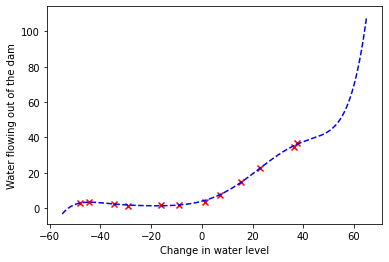

In [290]:
plt.scatter(X,y,marker="x",color="r")
plt.xlabel("Change in water level")
plt.ylabel("Water flowing out of the dam")
x_value=np.linspace(-55,65,2400)
x_value_poly = poly_feature.fit_transform(x_value.reshape(-1,1))
x_value_poly = std_scaler.transform(x_value_poly)
x_value_poly1 = np.hstack((np.ones((x_value_poly.shape[0],1)),x_value_poly))
y_value= x_value_poly1 @ theta_poly
plt.plot(x_value,y_value,"--",color="b")
plt.show()

In [291]:
train_poly,val_poly=learning_curve(X_new,y,X_new_val,yval,0)

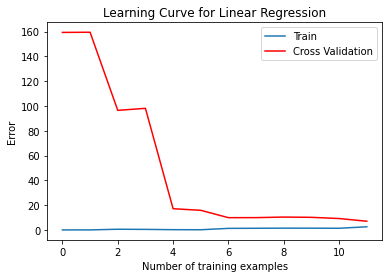

In [292]:
plt.plot(range(12),train_poly,label="Train")
plt.plot(range(12),val_poly,label="Cross Validation",color="r")
plt.title("Learning Curve for Linear Regression")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend()
plt.show()

In [293]:
train_poly,val_poly=learning_curve(X_new,y,X_new_val,yval,1)

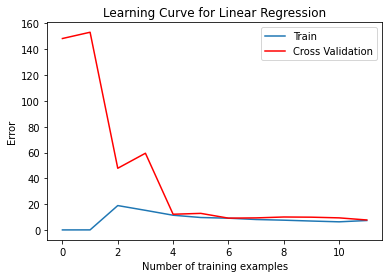

In [294]:
plt.plot(range(12),train_poly,label="Train")
plt.plot(range(12),val_poly,label="Cross Validation",color="r")
plt.title("Learning Curve for Linear Regression")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend()
plt.show()

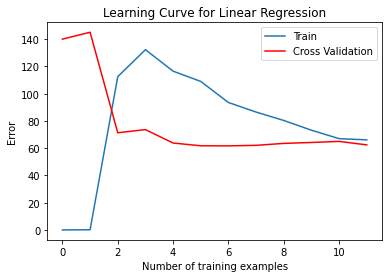

In [295]:
train_poly,val_poly=learning_curve(X_new,y,X_new_val,yval,100)
plt.plot(range(12),train_poly,label="Train")
plt.plot(range(12),val_poly,label="Cross Validation",color="r")
plt.title("Learning Curve for Linear Regression")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend()
plt.show()

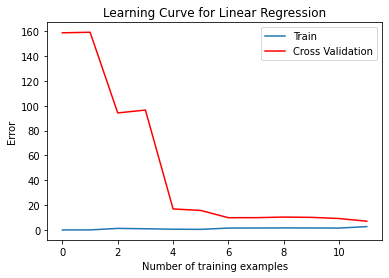

In [296]:
train_poly,val_poly=learning_curve(X_new,y,X_new_val,yval,0.03)
plt.plot(range(12),train_poly,label="Train")
plt.plot(range(12),val_poly,label="Cross Validation",color="r")
plt.title("Learning Curve for Linear Regression")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend()
plt.show()

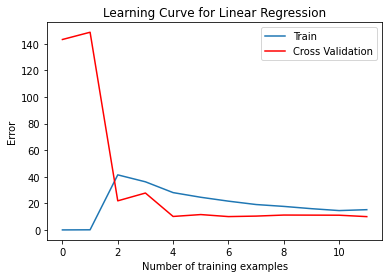

In [297]:
train_poly,val_poly=learning_curve(X_new,y,X_new_val,yval,3)
plt.plot(range(12),train_poly,label="Train")
plt.plot(range(12),val_poly,label="Cross Validation",color="r")
plt.title("Learning Curve for Linear Regression")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend()
plt.show()

In [298]:
####################now to start with hands on ml

In [299]:
X_1=np.hstack((np.ones((X.shape[0],1)),X))

In [302]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_1, y, rcond=1e-6)

In [303]:
theta_best_svd

array([[13.08790351],
       [ 0.36777923]])

In [304]:
### all gradient descent implemenattionS

In [305]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] 

In [306]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

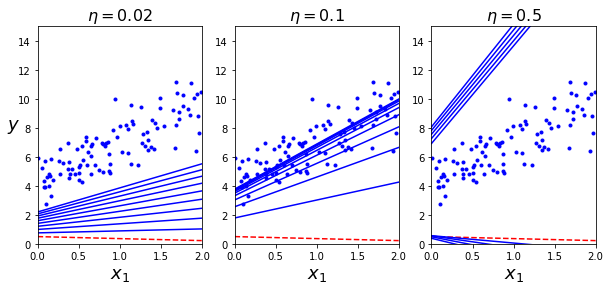

In [307]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

In [308]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

(0.0, 2.0, 0.0, 15.0)

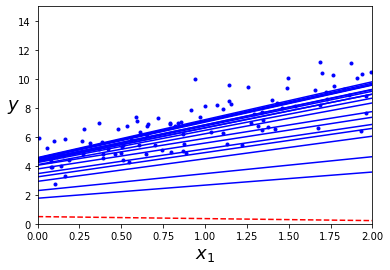

In [309]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])  

In [310]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [311]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [312]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

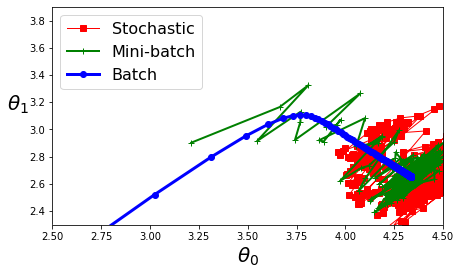

In [313]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

In [314]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [315]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

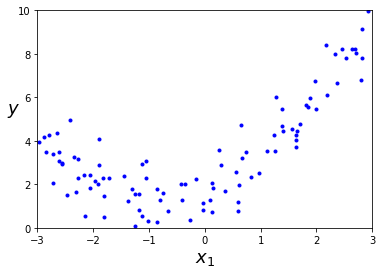

In [316]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
#save_fig("quadratic_data_plot")
plt.show()

In [317]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [318]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [320]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

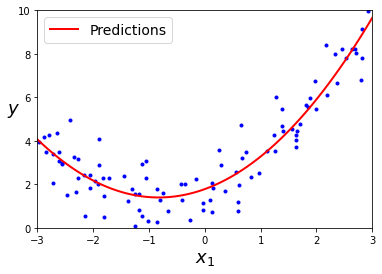

In [321]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

ValueError: illegal value in 4-th argument of internal None

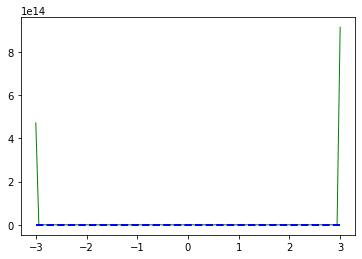

In [323]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [324]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

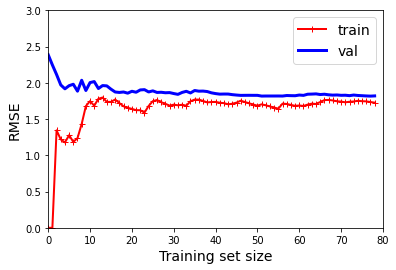

In [325]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
#save_fig("underfitting_learning_curves_plot")   # not shown
plt.show()                                      # not shown

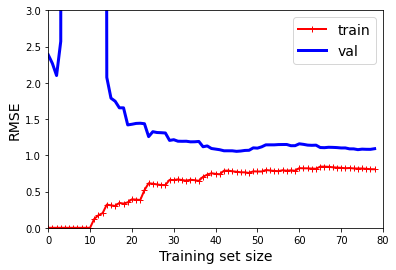

In [327]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
#save_fig("learning_curves_plot")  # not shown
plt.show()                        # not shown

# Regularized models

In [328]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [329]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [330]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

In [ ]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.show()

**Note**: to be future-proof, we set `max_iter=1000` and `tol=1e-3` because these will be the default values in Scikit-Learn 0.21.

In [335]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

In [ ]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)
plt.show()

In [349]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.77621741])

In [340]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

In [341]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

Early stopping example:

In [342]:
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

Create the graph:

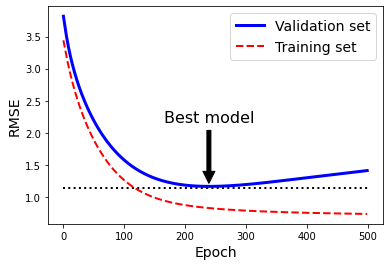

In [343]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

In [344]:
best_epoch, best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))

In [345]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [346]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

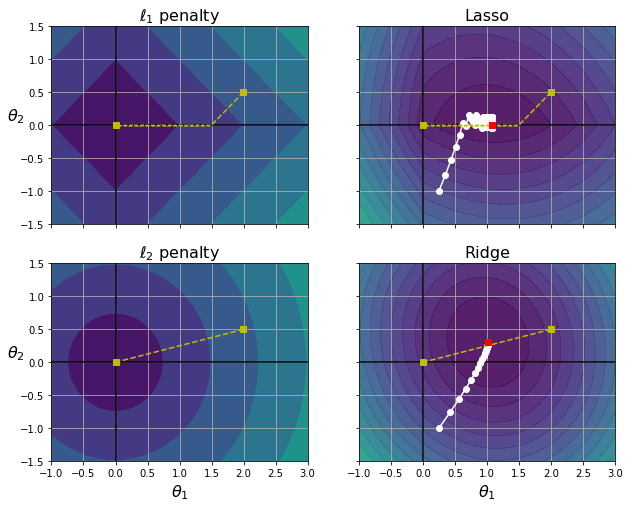

In [347]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.05, n_iterations = 200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))
for i, N, l1, l2, title in ((0, N1, 2., 0, "Lasso"), (1, N2, 0,  2., "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    ax = axes[i, 0]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, N / 2., levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)
    ax.set_ylabel(r"$\theta_2$", fontsize=16, rotation=0)

    ax = axes[i, 1]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title, fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)
plt.show()